In [33]:
import sklearn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt 
from neupy import plots
from sklearn.metrics import mean_squared_error
from math import sqrt

In [34]:
train_news = pd.read_csv("NormalizedPCA.csv")
test_news = pd.read_csv("NormalizedPCA_test.csv")

In [35]:
X_train = train_news.iloc[:, 2:22].values
Y_train = train_news.shares
X_test = test_news.iloc[:, 2:22].values
Y_test = test_news.shares

In [36]:
scaler_news = MinMaxScaler(feature_range = (0, 1))


Now We will rescale the shares as predictor values are principle components and they are scaled 

In [37]:
#X_train_scaled = scaler_news.fit_transform(X_train)
Y_train_scaled = scaler_news.fit_transform(Y_train.reshape(-1,1))
#X_test_scaled = scaler_news.fit_transform(X_test)
Y_test_scaled = scaler_news.fit_transform(Y_test.reshape(-1,1))


C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [125]:
mlp = MLPRegressor(hidden_layer_sizes=(13,13,13),max_iter=500, learning_rate_init = 0.019, verbose = False)

In [126]:
mlp.fit(X_train, Y_train_scaled)

C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.019, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

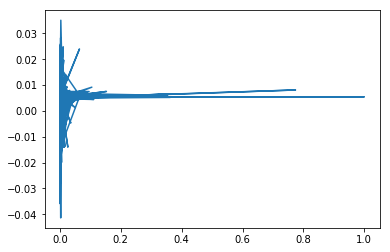

In [127]:
predictions = mlp.predict(X_test)
y_predicted = pd.DataFrame(predictions)
y_actual = pd.DataFrame(Y_test_scaled)

plt.plot(y_actual,y_predicted)

# RMSE

In [128]:
rms = sqrt(mean_squared_error(y_actual, y_predicted))
rms
#0.015761718306826374 learning rate = 0.019

0.015761718306826374

In [75]:
test_news["ActualScaledValues"] = y_actual
test_news["PredictedShares"] = y_predicted

test_news.to_csv("withPredictedShares.csv")